<a href="https://colab.research.google.com/github/Ajit103/Ajit103/blob/main/Copy_of_Ajit_Manandhar_Assignment_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Traffic Data Analysis




# The Problem

## King Street Transit Pilot
<img src='https://www.toronto.ca/wp-content/uploads/2019/06/9748-SPER-3866-04-1024x338.jpg' width=600>

The King Street Transit Pilot, also known as the "The King Street Transit Priority Corridor" is a project in the City of Toronto that aims to reduce traffic by diverting car traffic so that streetcars can go faster and other forms of transportation (cyclists, pedestrians) can safely increase, while making the area more of a "place" and not just a road.

Here's an image of the new street design:

<img src='https://www.toronto.ca/wp-content/uploads/2019/06/96b4-25-March-2019-KSP-Curb-Lane-Uses-FINAL-01-1024x360.png' width=600>

- Cars must turn right when they reach the boundaries of the area (Bathurst on the left or Jarvis on the right)
- There are some designated loading zones and taxi stands (they do **NOT** allow Uber/Lyft to use the taxi stands)
- There are curb lane cafe's (patios)
- There are TTC stops for the streetcar that goes east-west
- No street parking

I encourage you to visit this [neighbourhood](https://www.google.ca/maps/dir/Jarvis+Street+%26+King+Street+East,+Toronto,+ON/Bathurst+St+%26+King+St+W,+Toronto,+ON+M5V+2P9/@43.6474672,-79.3967461,14.94z/data=!4m14!4m13!1m5!1m1!1s0x89d4cb31aad1e4f3:0xa100366e19da353f!2m2!1d-79.3719073!2d43.6504761!1m5!1m1!1s0x882b34dfd4de979d:0xe18df58b063573c2!2m2!1d-79.4026703!2d43.6439035!3e2) if you are ever in the area. Here are the [rules depending on your type of transit](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/how-to-use-the-king-street-transit-pilot/) (car/TTC/bicycle).


The pilot project was launched on November 12, 2017 and ran for about a year before the changes were made permanent in 2019.

The city collected traffic data before and after the pilot project launched, so they could determine the impact on traffic (positive or negative). Data was collected using cameras at 31 intersections in the corridor. They also [released dashboards periodically](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/) to show the public how the project was going.

## Analysis Question
What was the impact of this pilot project on private vehicle traffic, and is it significant?

**Weekdays from Yonge to Jarvis**

**Weekends from Jarvis to Parliament**

**Period from Bathrust to Spadina**

**We're going to analyze this data and determine the answer to this question!**

---

# Data Collection

GPS tracking of TTC streetcars

Bluetooth sensors to evaluate car travel times

pedestrian and car volumes using video analytics

City obtained trend data on customer spending from Moneris Solutions Corporation




# Importing and Exploring the Data

[Travel Time Line Segments](https://open.toronto.ca/dataset/king-st-transit-pilot-bluetooth-travel-time-segments/)

[Travel Time Data](https://open.toronto.ca/dataset/king-st-transit-pilot-detailed-bluetooth-travel-time/)


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


In [2]:
# Import travel time data
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

time_interval = pd.read_csv(travel_times_url)

time_interval.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
0,CO_BA_CO_UN,2017-09-21 00:15:00,Weekday,Baseline,NaN,318.0,1
1,CO_BA_CO_UN,2017-09-21 00:55:00,Weekday,Baseline,NaN,225.0,1
2,CO_BA_CO_UN,2017-09-21 01:10:00,Weekday,Baseline,NaN,193.0,1
3,CO_BA_CO_UN,2017-09-21 01:40:00,Weekday,Baseline,NaN,224.0,1
4,CO_BA_CO_UN,2017-09-21 01:45:00,Weekday,Baseline,NaN,275.0,1


Uh-oh! We have a problem. Reading through the README file, we see that the result_id column represents a segment of road, but those codes are not readible. We need to translate those codes so we can extract the data for the segment we're interested in (Bathurst to Spadina). To do that, we need to look at the GeoJSON data.

**We need to install a library to do that!**

In [3]:
#install and import geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.4 MB/s 
     |████████████████████████████████| 16.7 MB 254 kB/s 
     |████████████████████████████████| 6.3 MB 41.5 MB/s 


In [4]:
import geopandas as gpd

In [5]:
# Import geojason data for name of the segment
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_segment = gpd.read_file(url_seg)

df_segment.head()

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."


# Data Cleaning

In this context, data cleaning means we're going to:
- Get rid of missing data or erroneous data
- Filter to include only the data we want to analyze
- Aggregate the data to make the analysis simpler
- Calculate our metrics


Second, we're going to slice the data to include only the data from either the "Baseline" or "Pilot" categories. We're going to use conditional indexing to do this. Recall that:

After that, there should be no more "Excluded" category in the dataset.

Now, let's use Pandas [Groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to aggregate the data and calculate the mean travel time in seconds.

The Pandas GroupBy function **makes the groups into indices**. Let's reset the index to undo that.

In [6]:
# Creating function to retrieve the segment code

def get_segment(street_name, street_from, to, place_df):
    """Get the segment code from the street name and from/to streets."""
    df1 = place_df[place_df['street'] == street_name]

    df2 = df1[df1['from_intersection'] == street_from]
    
    df3 = df2[df2['to_intersection'] == to]
    
    segment_code = df3['segment_name'].iloc[0]

    return segment_code

In [7]:
# Defining function for Analysis
def analyze_data(times_df, segment_of_interest, column_to_groupby, minutes):
    """Clean and pivot our data."""
    street_data = times_df[times_df['result_id'] == segment_of_interest]

    street_data = street_data.dropna(subset=['period_name'])
    
    street_data = street_data[street_data['category'] != 'Excluded']

    summary_comparison = street_data.groupby(['category', column_to_groupby]).mean()

    summary_comparison = summary_comparison.reset_index()

    pivoted_data = summary_comparison.pivot(index=column_to_groupby, columns='category', values='tt')

    # Minutes or seconds:
    if minutes == True:
        pivoted_data = pivoted_data / 60

    pivoted_data['pct_diff'] = (pivoted_data['Pilot'] - pivoted_data['Baseline']) / pivoted_data['Baseline'] * 100

    return pivoted_data


Travel time in minutes
----------------
category     Baseline     Pilot   pct_diff
period_name                               
AM Peak      2.472726  2.788615  12.774943
Afternoon    2.777424  3.088654  11.205692
Evening      3.894836  3.153600 -19.031260
Midday       3.129032  2.934290  -6.223717
Morning      1.991627  2.722596  36.702138
PM Peak      3.716912  3.307783 -11.007222



Text(0.5, 1.0, 'Percent Change in Travel Time: Bathurst to Spadina')

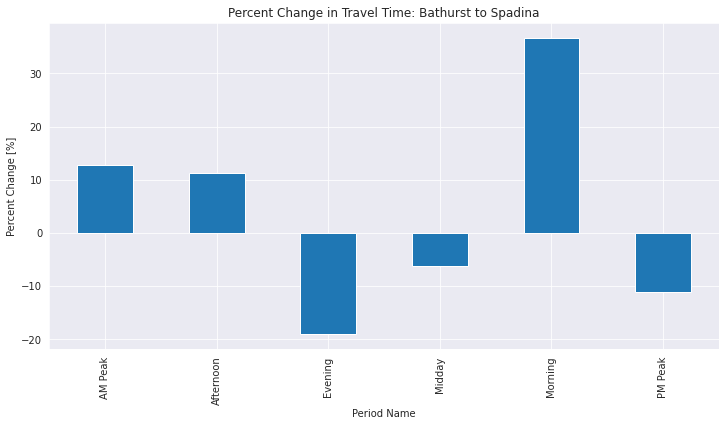

In [11]:
street = 'King'
from_street = 'Bathurst'
to = 'Spadina'
column_to_groupby = 'period_name'
min_boolean = True
# --

time_unit = 'seconds'
if min_boolean: # == True
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to, df_segment)

pivoted_data = analyze_data(time_interval, segment_of_interest, column_to_groupby, min_boolean)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
plt1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

plt1.set_ylabel('Percent Change [%]')

plt1.set_xlabel('Period Name')

plt1.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to)

**Weekdays from Yonge to Jarvis**

Travel time in minutes
----------------
category  Baseline     Pilot   pct_diff
day_type                               
Weekday    2.20313  2.663815  20.910455
Weekend    1.85486  3.220607  73.630731



Text(0.5, 1.0, 'Percent Change in Travel Time: Yonge to Jarvis')

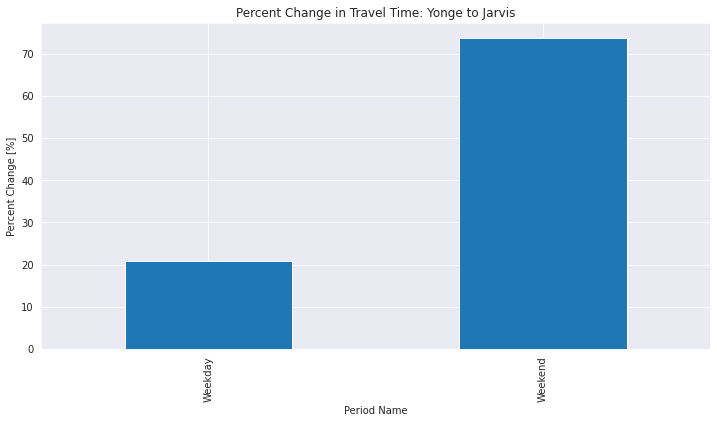

In [12]:
street = 'King'
from_street = 'Yonge'
to = 'Jarvis'
column_to_groupby = 'day_type'
min_boolean = True
# --

time_unit = 'seconds'
if min_boolean: # == True
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to, df_segment)

pivoted_data = analyze_data(time_interval, segment_of_interest, column_to_groupby, min_boolean)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
plt1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

plt1.set_ylabel('Percent Change [%]')

plt1.set_xlabel('Period Name')

plt1.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to)

**Conclusion**

As we can see from the above analysis, the travel time has increased significantly, just over 20%, on Weekdays from Yonge to Jarvis. This shows that the King Street Transit Pilot project has failed to reduce travel time for the traffic in this particular segment of the road.

**Jarvis to Parliament**

Travel time in minutes
----------------
category  Baseline     Pilot   pct_diff
day_type                               
Weekday   2.856477  3.071697   7.534455
Weekend   2.350105  3.438091  46.295192



Text(0.5, 1.0, 'Percent Change in Travel Time: Jarvis to Parliament')

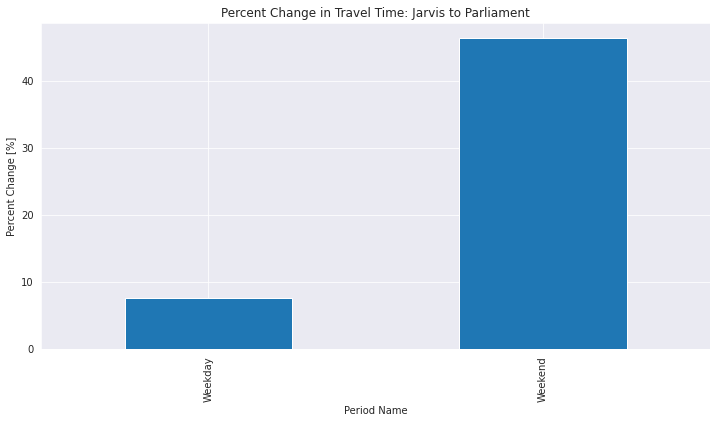

In [13]:
street = 'King'
from_street = 'Jarvis'
to = 'Parliament'
column_to_groupby = 'day_type'
min_boolean = True
# --

time_unit = 'seconds'
if min_boolean: # == True
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to, df_segment)

pivoted_data = analyze_data(time_interval, segment_of_interest, column_to_groupby, min_boolean)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
plt2 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

plt2.set_ylabel('Percent Change [%]')

plt2.set_xlabel('Period Name')

plt2.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to)

**Conclusion**

As we can see from the above analysis, the travel time has increased significantly, almost 50%, on Weekends from Jarvis to Parliament. This shows that the King Street Transit Pilot project has failed to reduce travel time for the traffic in this particular segment of the road.

# Summary of Commands
```
!pip install geopandas
pandas.DataFrame.describe(include='all')
pandas.DataFrame.unique()
pandas.DataFrame.groupby()
pandas.DataFrame.reset_index()

```